In [64]:
import numpy as np

## download data from MD17

In [65]:
!wget http://quantum-machine.org/gdml/data/npz/ethanol_dft.npz

--2021-06-17 14:43:22--  http://quantum-machine.org/gdml/data/npz/ethanol_dft.npz
Resolving quantum-machine.org (quantum-machine.org)... 130.149.80.145
Connecting to quantum-machine.org (quantum-machine.org)|130.149.80.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229472236 (219M)
Saving to: ‘ethanol_dft.npz’

100%[======================================>] 229,472,236 8.94MB/s   in 34s    

2021-06-17 14:43:57 (6.43 MB/s) - ‘ethanol_dft.npz’ saved [229472236/229472236]



In [66]:
data=np.load('ethanol_dft.npz')

In [67]:
xyz_coordinates=data['R']

In [68]:
xyz_coordinates.shape

(555092, 9, 3)

## convert to distances which are rotation invariant

In [69]:
moleculesize=xyz_coordinates.shape[1]
pairs=[]
for i in range(moleculesize):
    for j in range(i,moleculesize):
        pairs.append([i,j])

In [70]:
len(pairs)

45

In [71]:
distances=[]
for i, j in pairs:
    distances.append(np.linalg.norm(xyz_coordinates[:,i,:]-xyz_coordinates[:,j,:], axis=1))
distances=np.array(distances).T

In [72]:
distances.shape

(555092, 45)

## PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=2)
pca_output=pca.fit_transform(distances)

In [75]:
pca_output.shape

(555092, 2)

In [76]:
print(pca.explained_variance_ratio_)

[0.31850393 0.23349283]


In [77]:
print(pca.singular_values_)

[605.7866738  518.67950632]


## plot PCA dimensions as free energy

In [78]:
import matplotlib.pyplot as plt

In [79]:
plt.rcParams.update({
    "text.usetex": False,
    "font.weight":"bold",
    "axes.labelweight":"bold",
    "font.size":10,
    'pdf.fonttype':'truetype',
    'figure.dpi':300
})



In [83]:
nbins=100
z,x,y = np.histogram2d(pca_output[:,0],pca_output[:,1], bins=nbins)
z[z==0]=np.nan
F=-np.log(z)
F=F-np.nanmin(F)

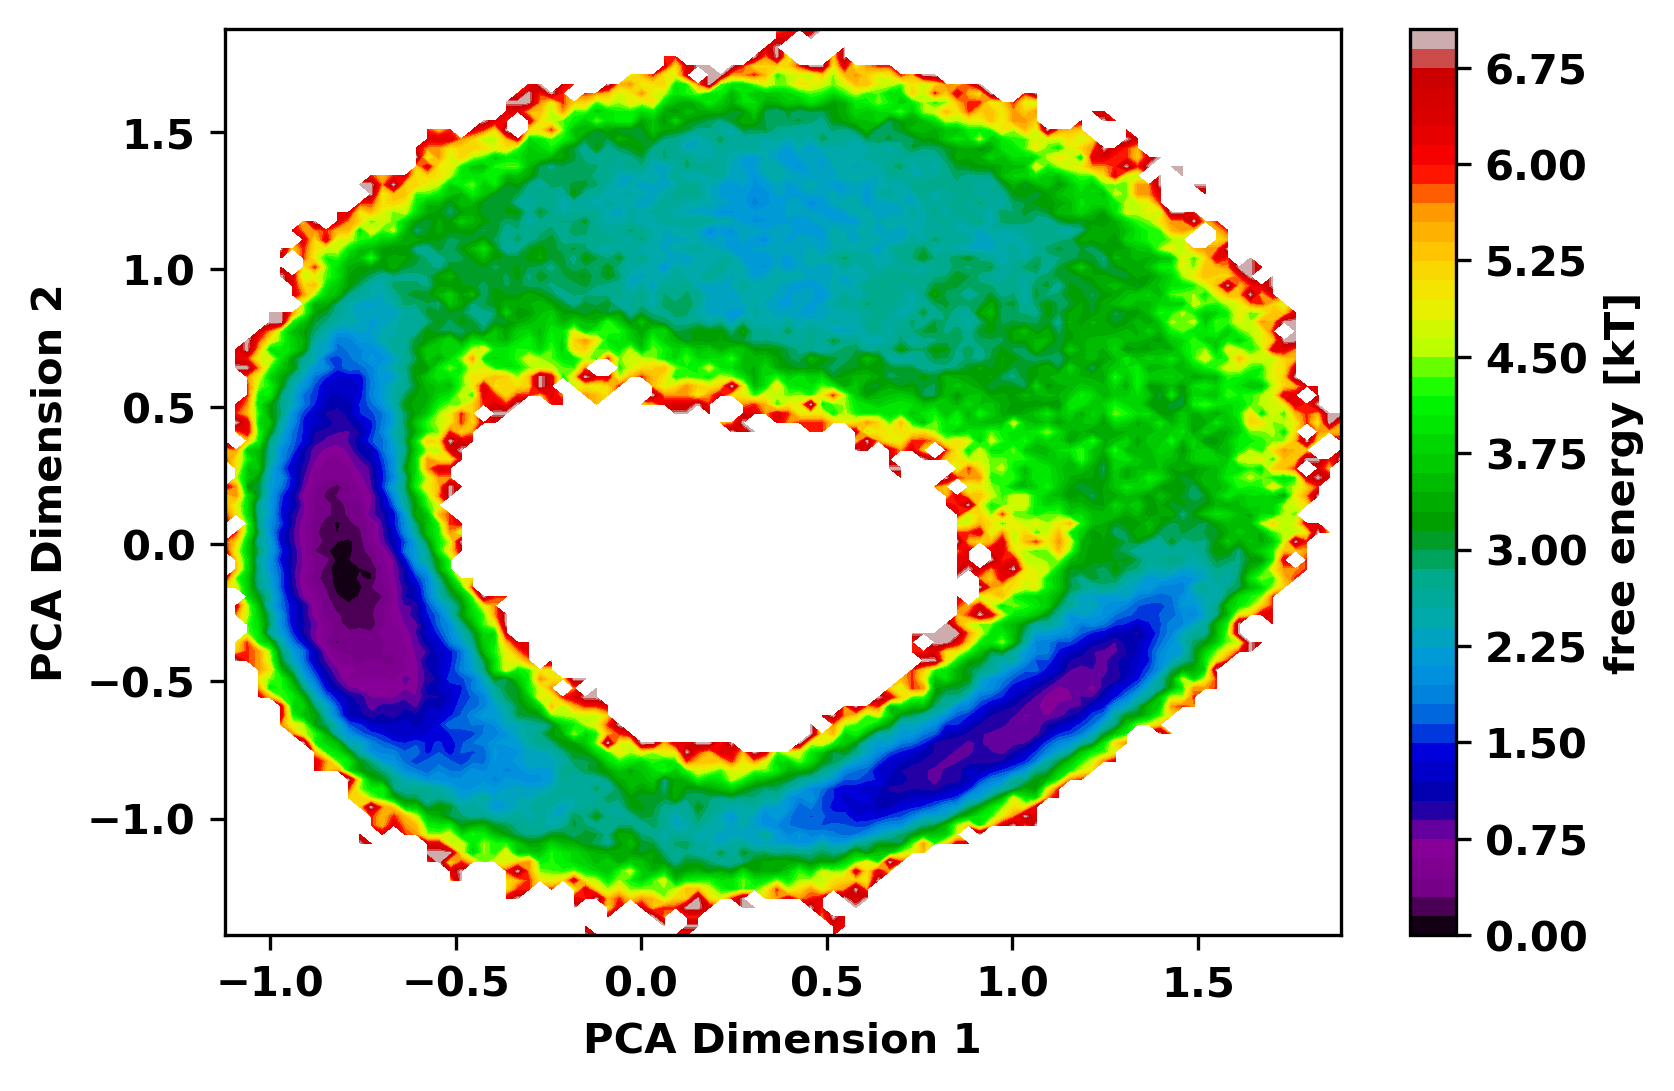

In [86]:
extent = [x[0], x[-1], y[0], y[-1]]
dX = (x[-1]-x[0])/nbins
dY = (y[-1]-y[0])/nbins
cf=plt.contourf(F.T, 50, cmap = 'nipy_spectral', extent=extent)
cbar=plt.colorbar(cf)
cbar.set_label('free energy [kT]')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()
#plt.savefig('pca-ethanol.png')